In [7]:
import numpy as np
from random import random

In [8]:
import scipy.io as sio
Hm = sio.loadmat('F:\sem 2\ct111\ct project\Hmatrix.mat')
H_mat1 = Hm['H']

In [9]:
import matplotlib.pyplot as plt

In [10]:
(h_r,h_c) = H_mat1.shape
#print(h_r)
#print(h_c)


In [11]:
#for running this code we want to notify you that before run cells of simulation function and ploting the graph you first need to run two cells below it which are traversing the H matrix and our bsc_decoder function 

In [14]:
def simulation(p):
    pcorr = [];

    Nsim = 10
    perr = []
    
    #number of message bits in recived message.
    size = 5056

    it = 15
    box = np.zeros((Nsim,it))
    trans = [0 for x in range(size)]


    n_err = 0;
    n_corr = 0;
    for j in range(Nsim):
        Message=[]
        for k in range(size):
            #for inserting errors in message using cross-over probability.
            if(random()>1-p):
                 Message.append(1)
            else:
                 Message.append(0)
            
        Message = np.array(Message)
        ans,box[j] = bsc_decoder(Message)
    
    #for storing values of p error at every itreation
    dummy = np.zeros(it+1);
    dummy[0] = p
    dummy[1:] = np.sum(box,axis = 0)/Nsim
    
    
    return dummy;

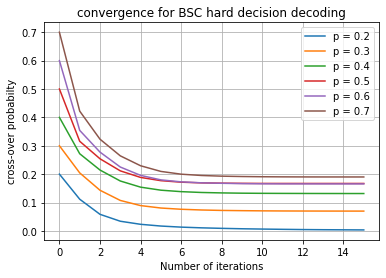

In [15]:
it = 16
for i in range(2,8):
    plt.plot(range(it),simulation(i/10))
plt.title("convergence for BSC hard decision decoding")
plt.xlabel("Number of iterations")
plt.ylabel("cross-over probabilty")
plt.legend(["p = 0.2", "p = 0.3","p = 0.4","p = 0.5","p = 0.6","p = 0.7"])
plt.grid()

In [12]:
#for traversing H matrix to get indices of VNs.
H = np.array([[1,0,0,0,0,1,0,1,0,1,0,0],
              [1,0,0,1,1,0,0,0,0,0,1,0],
              [0,1,0,0,1,0,1,0,1,0,0,0],
              [0,0,1,0,0,0,1,1,0,0,0,1],
              [0,0,1,0,0,1,0,0,0,0,1,1],
              [0,1,0,0,1,0,0,0,1,0,1,0],
              [1,0,0,1,0,0,1,0,0,1,0,0],
              [0,1,0,0,0,1,0,1,0,1,0,0],
              [0,0,1,1,0,0,0,0,1,0,0,1]])

(row_h,col_h) = H_mat1.shape;
    
dc = 0
dv = 0

for i in range(row_h):
    if(H_mat1[i,0] == 1):
        dv = dv + 1
        
for i in range(col_h):
    if(H_mat1[0,i] == 1):
        dc = dc + 1


#for getting all values of VNs which are connected to particuler CN.
check = np.zeros((row_h,dc))+-1;


#for getting index of all VNs which are connected to particuler CN.
index = np.zeros((row_h,dc))+-1;

for i in range(row_h):

    #to indicate number of VNs connected to particulare CN.
    f = -1;
    for j in range(col_h):
        if(H_mat1[i,j] == 1):
            f = f + 1;
            index[i,f] = j;


In [13]:
def bsc_decoder(message):
    
    (row_c,col_c) = check.shape;

    ans = np.zeros(len(message));

    
    #copy of our message which we return at end.
    ans = message;
    
    for i in range(row_c):

          for j in range(col_c):
            check[i,j] = ans[int(index[i,j])];

    
    count = 0;

    n_it = 15;
    store = np.zeros(n_it);
    while(count < n_it):
        
        
                    
        #to store every predicted value for particular VN by its CNs.
        Vn = np.zeros((len(ans),dv))+-1;



        #counter which knows how many pridicted values store in VN form each CN.
        dh = np.zeros(len(ans));


        for i in range(row_c):

            for j in range(col_c):
                sum1 = 0;

                for k in range(col_c):

                    if(k == j):
                        continue;

                    sum1 = sum1 + check[i,k];

                sum1 = sum1%2;

                Vn[int(index[i,j]),int(dh[int(index[i,j])])] = sum1;

                #counter to store number of Cns connedcted to VNs
                dh[int(index[i,j])] = dh[int(index[i,j])] + 1;


        #majority voting.

        (row_v,col_v) = Vn.shape;

        #12
        for i in range(row_v): 

            temp1 = np.count_nonzero(Vn[i,:int(dh[i])]);
            temp0 = np.size(Vn[i,:int(dh[i])]) - np.count_nonzero(Vn[i,:int(dh[i])]);
            
            if(message[i] == 0):
                temp0 = temp0 + 1;
            
            else:
                temp1 = temp1 +1;
        
            if(temp0 > temp1):
                ans[i] = 0;
            
            elif(temp0 == temp1):
                ans[i] = 0;
            else:
                ans[i] = 1;
    
        for i in range(row_c):

            for j in range(col_c):
                check[i,j] = ans[int(index[i,j])];

        store[count] = np.count_nonzero(ans)/len(ans)

        count = count + 1;

    return ans,store;